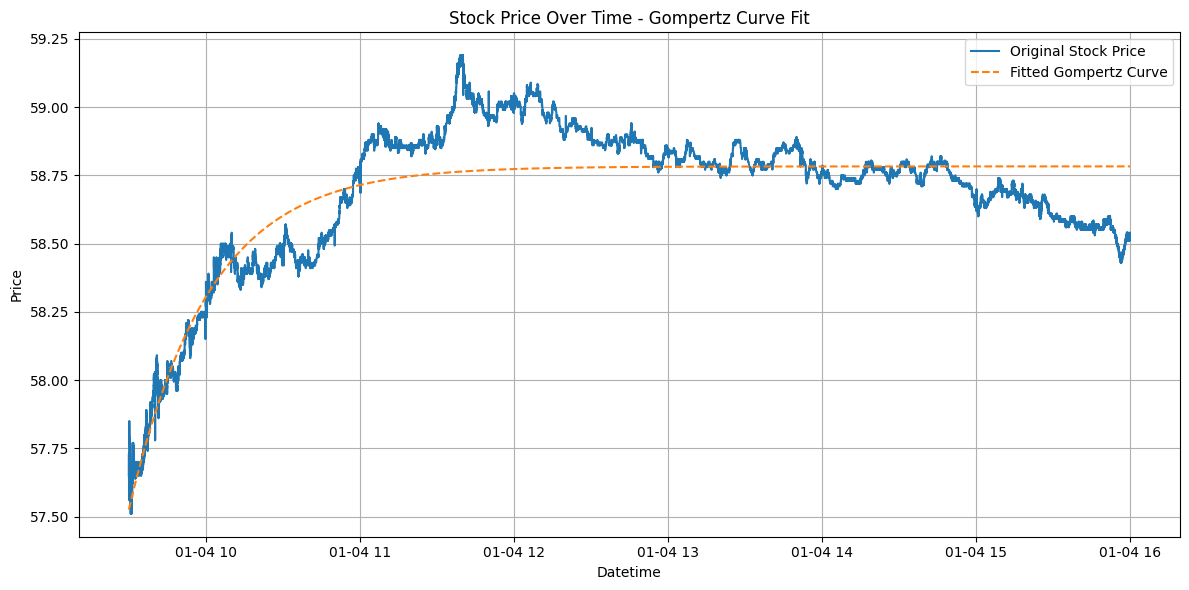

R² Score: 0.7621206358200987
Optimized Parameters: a = 58.7829, b = -0.0216, c = 0.000541
Covariance Matrix:
 [[ 1.15415187e-06 -4.11196554e-09 -1.74510454e-09]
 [-4.11196554e-09  6.34852858e-09 -1.76787994e-10]
 [-1.74510454e-09 -1.76787994e-10  1.28240085e-11]]


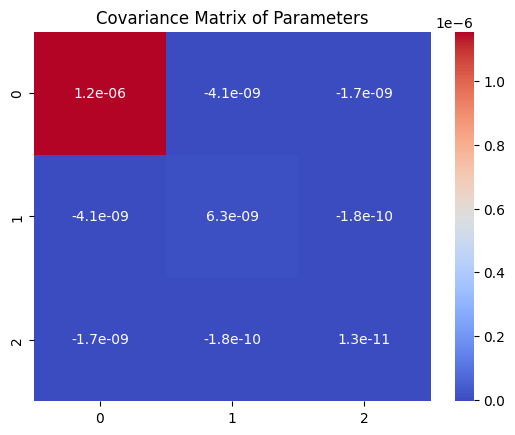

In [2]:
# PRACTICAL 02: Gompertz Curve Fitting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Step 1: Load the dataset
path = "/content/taq-cat-t-jan042010.txt"  # Update with your actual path
df = pd.read_csv(path, sep='\s+')

# Step 2: Combine datetime fields
df['Datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' +
                                df['hour'].astype(str) + ':' +
                                df['minute'].astype(str) + ':' +
                                df['second'].astype(str))

# Drop original time columns
df.drop(['date', 'hour', 'minute', 'second'], axis=1, inplace=True)

# Step 3: Sort and set time index
df.sort_values('Datetime', inplace=True)
df.set_index('Datetime', inplace=True)

# Step 4: Prepare data
x_time = (df.index - df.index.min()).total_seconds()
y = df['price']

# Step 5: Define Gompertz model
def gompertz_curve(t, a, b, c):
    return a * np.exp(b * np.exp(-c * t))

# Step 6: Estimate initial guesses
a_init = y.iloc[0]
b_init = 2.7
c_init = 1 / df.index[int(len(df)/2)].year
p0 = [a_init, b_init, c_init]

# Step 7: Fit the model
params, cov = curve_fit(gompertz_curve, x_time, y, p0=p0, maxfev=10000)

# Step 8: Predict
y_pred = gompertz_curve(x_time, *params)

# Step 9: Visualize
plt.figure(figsize=(12, 6))
plt.plot(df.index, y, label="Original Stock Price")
plt.plot(df.index, y_pred, '--', label="Fitted Gompertz Curve")
plt.title("Stock Price Over Time - Gompertz Curve Fit")
plt.xlabel("Datetime")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Step 10: Model evaluation
r2 = r2_score(y, y_pred)
print("R² Score:", r2)
print("Optimized Parameters: a = {:.4f}, b = {:.4f}, c = {:.6f}".format(*params))
print("Covariance Matrix:\n", cov)

# Heatmap for covariance matrix
sns.heatmap(cov, annot=True, cmap="coolwarm")
plt.title("Covariance Matrix of Parameters")
plt.show()
